# 02. News classification with TF-IDF and Logistic Regression

Author: [ArtyomR](https://github.com/ArtyomR)  
Source: [02. News classification with TF-IDF and Logistic Regression.ipynb](https://github.com/ArtyomR/AI-News-Classification/blob/main/02.%20News%20classification%20with%20TF-IDF%20and%20Logistic%20Regression.ipynb)

**In this Notebook I'll walk through News classification with TF-IDF and Logistic Regression**  
Next steps were implemented.
1. Text preparation
2. TF-IDF vectorization
3. Logistic Regression classification

Dataset was creted within [Chinese AI news agregation project](https://t.me/chinese_ai_news).  
These vectorizer and classification module are used in [Chinese AI news agregation project](https://t.me/chinese_ai_news) since 07.12.23

## Importing Necessary Libraries

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from pymystem3 import Mystem
import re
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import feature_selection
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import joblib

## Data upload and preparation

In [ ]:
#Read dataset
data = pd.read_excel('ai_articles_prep_231124.xlsx', index_col=0)

In [ ]:
data.head()

,publication,url,title,title_ru,paragraph_one,paragraph_one_ru,publish_date,top_image,msg_id,tags,publish_date_tg,published_flag,language,combined_text_ru
0,Published,https://www.scmp.com/tech/article/3242683/brit...,British AI chip darling Graphcore pulls out of...,Британский разработчик чипов искусственного ин...,The British graphics processing unit maker Gra...,Британский производитель графических процессор...,2023-11-24 15:00:09,https://cdn.i-scmp.com/sites/default/files/sty...,1483.0,#Nvidia #чипы #спорт,2023-11-24 14:41:13,1,en,Британский разработчик чипов искусственного ин...
1,Published,https://www.scmp.com/week-asia/people/article/...,Asia-Pacific is new ‘ground zero’ for cybercri...,Азиатско-Тихоокеанский регион стал новым «эпиц...,The ‘attack rate’ in the Asia-Pacific is ‘well...,«Уровень атак» в Азиатско-Тихоокеанском регион...,2023-11-24 17:00:46,https://cdn.i-scmp.com/sites/default/files/sty...,1484.0,#криминал,2023-11-24 14:41:43,1,en,Азиатско-Тихоокеанский регион стал новым «эпиц...
2,Published,https://global.chinadaily.com.cn/a/202311/24/W...,AI's ethical governance emphasized,Подчеркнуто этическое управление ИИ,Artificial intelligence presents not only enor...,Искусственный интеллект представляет не только...,2023-11-24 00:00:00,https://img2.chinadaily.com.cn/images/202311/2...,1485.0,#риск #мероприятия,2023-11-24 14:42:14,1,en,Подчеркнуто этическое управление ИИ Искусствен...
3,Not published,https://www.ithome.com/0/734/820.htm,西班牙一设计师打造当地首个 AI 模特，最高月入 1 万欧元,Испанский дизайнер создает первую местную моде...,IT之家 11 月 24 日消息，据外媒 euronews 当地时间周三报道，西班牙首个 A...,"24 ноября IT House сообщил, что зарубежные СМИ...",NaT,https://img.ithome.com/newsuploadfiles/2023/11...,NaN,NaN,NaN,0,cn,Испанский дизайнер создает первую местную моде...
4,Not published,https://www.ithome.com/0/734/870.htm,研究显示 ChatGPT 可为科学假说生成虚假数据集，对学术诚信造成威胁,"Исследование показывает, что ChatGPT может ген...",IT之家 11 月 24 日消息，据《自然》杂志当地时间周三报道，本月初发表在《美国医学会眼...,"IT House News от 24 ноября, согласно сообщению...",NaT,https://img.ithome.com/newsuploadfiles/2023/11...,NaN,NaN,NaN,0,cn,"Исследование показывает, что ChatGPT может ген..."


In [ ]:
data.columns

Index(['publication', 'url', 'title', 'title_ru', 'paragraph_one',
       'paragraph_one_ru', 'publish_date', 'top_image', 'msg_id', 'tags',
       'publish_date_tg', 'published_flag', 'language', 'combined_text_ru'],
      dtype='object')

In [ ]:
data.isna().sum()

publication            0
url                    0
title                  0
title_ru               0
paragraph_one         16
paragraph_one_ru      18
publish_date        2286
top_image            816
msg_id              1814
tags                2089
publish_date_tg     1814
published_flag         0
language               0
combined_text_ru       0
dtype: int64

We need **'published_flag'** and **'combined_text_ru'** only. And I'll drop other columns.

In [ ]:
dataset=data.drop(columns = ['publication', 'url', 'title', 'title_ru', 'paragraph_one',
       'paragraph_one_ru', 'publish_date', 'top_image', 'msg_id', 'tags',
       'publish_date_tg','language'],axis = 1)
dataset

,published_flag,combined_text_ru
0,1,Британский разработчик чипов искусственного ин...
1,1,Азиатско-Тихоокеанский регион стал новым «эпиц...
2,1,Подчеркнуто этическое управление ИИ Искусствен...
3,0,Испанский дизайнер создает первую местную моде...
4,0,"Исследование показывает, что ChatGPT может ген..."
...,...,...
3129,0,Grammarly использует возможности генеративного...
3130,0,Существует ограничение в 5 разговоров за раунд...
3131,0,"Возможен экспорт в формат PDF/Word, онлайн-чат..."
3132,0,"81% сотрудников считают, что искусственный инт..."


## Text Preprocessing

### Pymorphy2 - <span style="color:red">doesn't support Python 3.11 </span>.

In [ ]:
!pip install pymorphy2

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
from pymorphy2 import MorphAnalyzer

In [ ]:
morph = MorphAnalyzer()
word = 'бегали'
parsed = morph.parse(word)[0]
print(parsed.normal_form)  # 'бегать'

AttributeError: module 'inspect' has no attribute 'getargspec'

### pymystem3 - <span style="color:red">verey very slow with Windows 11</span>.

In [ ]:
!Pip install pymystem3

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
%%time

def text_pre_processing(text, flg_stemm=False, flg_lemm=True, lst_stopwords=None):
    # case folding and remove punctutation
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())

    # tokenizing
    lst_text = text.split()
    # remove Stopwords
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in
                    lst_stopwords]

    # Stemming (remove -ing, -ly, ...)
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]

    # Lemmatisation (convert the word into root word)
    if flg_lemm == True:
        lem = Mystem()
        lst_text = [lem.lemmatize(word)[0] for word in tqdm(lst_text)]

    #back to string from list
    text = " ".join(lst_text)
    return text

dataset['combined_text_ru_clean'] = dataset['combined_text_ru'].apply(lambda combined_text_ru: text_pre_processing(combined_text_ru))
dataset.head()

 90%|████████████████████████████████████████████████████████████████████████        | 119/132 [01:19<00:08,  1.49it/s]

15:20 50 h estimated to process

### Pymorphy 3 - <span style="color:green">it's OK</span>.

In [15]:
!pip install pymorphy3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 51.5 MB/s eta 0:00:00


In [16]:
from pymorphy3 import MorphAnalyzer

In [ ]:
tqdm.pandas(desc="Progress_apply") ## add tqdm progress bar with progress_apply method

In [9]:
%%time

def text_pre_processing(text, flg_stemm=False, flg_lemm=True, lst_stopwords=None):
    # case folding and remove punctutation
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())

    # tokenizing
    lst_text = text.split()
    # remove Stopwords
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in
                    lst_stopwords]

    # Stemming (remove -ing, -ly, ...)
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]

    # Lemmatisation (convert the word into root word)
    if flg_lemm == True:
        lem = MorphAnalyzer()
        lst_text = [lem.parse(word)[0].normal_form for word in tqdm(lst_text, desc='Lemmatize')]

    #back to string from list
    text = " ".join(lst_text)
    return text


CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 10 µs


In [ ]:
dataset['combined_text_ru_clean'] = dataset['combined_text_ru'].progress_apply(lambda combined_text_ru: text_pre_processing(combined_text_ru))
dataset.head()

### Save and restore file with lematized text

In [ ]:
dataset.to_excel('ai_articles_lem_231124.xlsx')

In [ ]:
dataset = pd.read_excel('ai_articles_lem_231124.xlsx', index_col=0)
dataset.head(2)

,published_flag,combined_text_ru,combined_text_ru_clean
0,1,Британский разработчик чипов искусственного ин...,британский разработчик чип искусственный интел...
1,1,Азиатско-Тихоокеанский регион стал новым «эпиц...,азиатскотихоокеанский регион стать новый эпице...


## Split dataset for train and test

Split the dataset into train and test with a comparison of 70:30, 70% of the dataset for the training process and 30% for the testing process, for variable X = combined_text_ru_clean and variable y (target) = published_flag

In [ ]:
# split dtaset on 2 gataframes
df_train, df_test = train_test_split(
    dataset,
    test_size=0.3,
    random_state=72
)
print(len(df_train),df_train.head(2),len(df_test))

2158       published_flag                                   combined_text_ru  \
723                1  Школьный гимн и музыка на электрогитаре, котор...   
2997               0  Недавний минимум в 185 юаней: самостоятельная ...   

                                 combined_text_ru_clean  
723   школьный гимн и музыка на электрогитара которы...  
2997  недавний минимум в 185 юань самостоятельный по...   926


#### Save train and test datasets for futher usage

In [ ]:
df_train.to_excel('ai_articles_train_231124.xlsx')

In [ ]:
df_test.to_excel('ai_articles_test_231124.xlsx')

In [10]:
df_test=pd.read_excel('/content/drive/MyDrive/Data2/ai_articles_test_231124.xlsx')

In [11]:
df_train=pd.read_excel('/content/drive/MyDrive/Data2/ai_articles_train_231124.xlsx')

#### Split dataset on features (X) and classes (y)

In [12]:
# split dataset on features (X) and classes (y)
X_train = df_train['combined_text_ru_clean']
y_train = df_train['published_flag']
X_test = df_test['combined_text_ru_clean']
y_test = df_test['published_flag']

print('len(y_train):',len(y_train))
print(y_train[:5])
print('len(y_test):',len(y_test))
print(y_test[:5])

len(y_train): 2158
0    1
1    0
2    0
3    1
4    1
Name: published_flag, dtype: int64
len(y_test): 926
0    1
1    1
2    1
3    1
4    0
Name: published_flag, dtype: int64


## TF-IDF vectorization

In [ ]:
# Tf-Idf
tfidf_vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1,2))

In [ ]:
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
dic_vocabulary = tfidf_vectorizer.vocabulary_

In [ ]:
word = "искусственный интеллект"
dic_vocabulary[word]

3888

In [ ]:
word = "чип"
dic_vocabulary[word]

9524

In [ ]:
X_train.loc[0]

'британский разработчик чип искусственный интеллект graphcore уходить из китай поскольку конкурент nvidia становиться последний жертва ограничение экспорт в сша британский производитель графический процессор graphcore заявить что в это месяц всё он топовый продукт подпадать под новый экспортный правило вашингтон компания рассматриваться как потенциальный конкурент nvidia который вложить ресурс в настройка чип для китай выходить за рамка развивающийся ограничение сша'

## Получение списка ключевых слов и их значения TF-IDF для первого документа со значением published_flag == 1

In [ ]:
# Получение списка ключевых слов и их значения TF-IDF для первого документа# Индексы первого документа с published_flag == 1
#index_published_flag_1 = y_train[y_train['published_flag'] == 1].index[0]
index_published_flag_1 = y_train[y_train == 1].index[0]

# TF-IDF вектор для первого документа с published_flag == 1
tfidf_vector_published_flag_1 = X_train_tfidf[index_published_flag_1, :]

# Преобразование в массив и сортировка признаков по весам
features_and_weights = list(zip(vectorizer.get_feature_names_out(), tfidf_vector_published_flag_1.toarray()[0]))
top_10_features_published_flag_1 = sorted(features_and_weights, key=lambda x: x[1], reverse=True)[:10]

# Вывод топ-10 признаков TF-IDF для первого документа с published_flag == 1
print('Ключевые слова:',top_10_features_published_flag_1)

Ключевые слова: [('zhiyuan', 0.39779279251874705), ('a1', 0.35469113290726895), ('робот', 0.3303140189874899), ('робот zhiyuan', 0.23646075527151264), ('чжихуэй', 0.23646075527151264), ('huawei', 0.1286553301322315), ('чжихуэй цзюня', 0.11823037763575632), ('экспедиция', 0.11823037763575632), ('запустить робот', 0.11374248861861812), ('кг', 0.11026141145363032)]


## Топ-20 слов в TF-IDF для published

In [ ]:
# Индексы признаков, соответствующих published_flag == 1
published_flag_1_indices = y_train[y_train == 1].index

# Убедимся, что индексы находятся в допустимом диапазоне
published_flag_1_indices = published_flag_1_indices[published_flag_1_indices < y_train.shape[0]]

# Средний TF-IDF вес для каждого признака среди документов с published_flag == 1
mean_tfidf_values = X_train_tfidf[published_flag_1_indices, :].mean(axis=0).A1.ravel()

# Создание DataFrame для удобства работы с данными
feature_names = vectorizer.get_feature_names_out()
tfidf_df = pd.DataFrame({'Feature': feature_names, 'MeanTFIDF': mean_tfidf_values})

# Сортировка по среднему TF-IDF весу
top_10_tfidf_features_published_flag_1 = tfidf_df.sort_values(by='MeanTFIDF', ascending=False).head(20)

# Вывод топ-10 признаков TF-IDF для published_flag == 1
print(top_10_tfidf_features_published_flag_1)

                      Feature  MeanTFIDF
9550                      что   0.029361
5079                       на   0.029265
3715                интеллект   0.029055
3887            искусственный   0.028812
3888  искусственный интеллект   0.028612
2938                      для   0.025560
4897                   модель   0.023605
4015                       ия   0.020998
6433                       по   0.020851
1963                     быть   0.019591
906                        it   0.018633
6057                       от   0.017876
4297                 компания   0.017759
827                     house   0.017716
908                  it house   0.017676
5532                    новый   0.017283
4464                  который   0.016900
2662                      год   0.016849
4161                    китай   0.015027
554                   chatgpt   0.014946


## Топ-20 слов в TF-IDF для unpublished

In [ ]:
# Индексы признаков, соответствующих published_flag == 0
published_flag_0_indices = y_train[y_train == 0].index

# Убедимся, что индексы находятся в допустимом диапазоне
published_flag_0_indices = published_flag_0_indices[published_flag_0_indices < y_train.shape[0]]

# Средний TF-IDF вес для каждого признака среди документов с published_flag == 0
mean_tfidf_values = X_train_tfidf[published_flag_0_indices, :].mean(axis=0).A1.ravel()

# Создание DataFrame для удобства работы с данными
feature_names = vectorizer.get_feature_names_out()
tfidf_df = pd.DataFrame({'Feature': feature_names, 'MeanTFIDF': mean_tfidf_values})

# Сортировка по среднему TF-IDF весу
top_10_tfidf_features_published_flag_0 = tfidf_df.sort_values(by='MeanTFIDF', ascending=False).head(20)

# Вывод топ-10 признаков TF-IDF для published_flag == 1
print(top_10_tfidf_features_published_flag_0)

                      Feature  MeanTFIDF
5079                       на   0.030321
9550                      что   0.026224
3715                интеллект   0.025684
3887            искусственный   0.025618
3888  искусственный интеллект   0.025415
2938                      для   0.024988
4015                       ия   0.021359
4897                   модель   0.020727
4161                    китай   0.020021
6433                       по   0.019726
1963                     быть   0.018979
4297                 компания   0.018138
5532                    новый   0.017669
6057                       от   0.016512
906                        it   0.016337
4990                     мочь   0.016220
4464                  который   0.015908
4077                      как   0.015738
827                     house   0.015659
908                  it house   0.015566


In [ ]:
print(len(mean_tfidf_values),mean_tfidf_values)

10000 [0.00353778 0.00037148 0.0007567  ... 0.00032043 0.00079161 0.00054857]


## Logistic Regression train and score

In [ ]:
# Logistic Regression train
logreg = LogisticRegression()
logreg.fit(X_train_tfidf, y_train)

LogisticRegression()

In [ ]:
# Prediction for test set
y_pred = logreg.predict(X_test_tfidf)

In [ ]:
# Model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Additional metrics
print(classification_report(y_test, y_pred))

Accuracy: 0.7904967602591793
              precision    recall  f1-score   support

           0       0.79      0.87      0.82       525
           1       0.80      0.69      0.74       401

    accuracy                           0.79       926
   macro avg       0.79      0.78      0.78       926
weighted avg       0.79      0.79      0.79       926



## Manual prediction test

In [ ]:
y_test

1167    1
1542    1
1103    1
1021    1
788     0
       ..
786     0
797     0
2686    1
2913    0
2378    0
Name: published_flag, Length: 926, dtype: int64

In [ ]:
X_test[1167]

'tencent cloud запускать продукт для рисование с использование искусственный интеллект поддерживать более 25 создать стиль 10 сентябрь it house сообщить что на конференция tencent global digital ecology conference 2023 состояться 7 сентябрь компания tencent cloud официально представить новый продукт для рисование с использование искусственный интеллект который использовать собственный модель рисование с использование искусственный интеллект tencent для обеспечение технология создание и редактирование изображение с использование искусственный интеллект позволять пользователь легко создавать связанный с ввод графический контент на основа ввести текст или изображение согласно официальный сообщение продукт для рисование с использование искусственный интеллект выпустить tencent cloud на этот раз основать на модель алгоритм рисование разработать самостоятельно и специально оптимизировать для возможность создание рисунок в китайский контекст продукт включать в себя такой функция как интеллект

In [ ]:
X_test_1_tfidf = tfidf_vectorizer.transform([X_test.loc[1167]])

In [ ]:
y_1_pred = logreg.predict(X_test_1_tfidf)
y_1_pred

array([1], dtype=int64)

In [ ]:
X_test[788]

'аналитик генеративный ия слишком разрекламировать и ожидаться что в 2024 год смежный отрасль быть холодный 10 октябрь аналитический агентство ccs insight сделать прогноз что сфера генеративный ия мочь столкнуться с проверка реальность в следующий год расти а призыв к регулирование ия расти индустрия ия в будущее мочь стать холодный а технологический развитие постепенно быть демонстрировать признак замедление главный прогноз ccs insight на 2024 год заключаться в тот что генеративный ия включиться в 2024 год поскольку затрата и риск связанный с технология ия заменить шумиха вокруг этот технология'

In [ ]:
X_test_0_tfidf = tfidf_vectorizer.transform([X_test.loc[788]])

In [ ]:
y_0_pred = logreg.predict(X_test_0_tfidf)
y_0_pred

array([0], dtype=int64)

## Save model and vectorizer

In [ ]:
# Save Logistic Regression model
model_filename = 'logreg_model.joblib'
joblib.dump(logreg, model_filename)

# Save TF-IDF vectorizer
tfidf_vectorizer_filename = 'tfidf_vectorizer.joblib'
joblib.dump(tfidf_vectorizer, tfidf_vectorizer_filename)

['tfidf_vectorizer.joblib']

## Upload model and vectorizer

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Upload Logistic Regression model
# model_filename = 'logreg_model.joblib'
model_filename = '/content/drive/MyDrive/Data2/logreg_model.joblib'
loaded_logreg = joblib.load(model_filename)

# Upload TfidfVectorizer
#tfidf_vectorizer_filename = 'tfidf_vectorizer.joblib'
tfidf_vectorizer_filename = '/content/drive/MyDrive/Data2/tfidf_vectorizer.joblib'
loaded_tfidf_vectorizer = joblib.load(tfidf_vectorizer_filename)

In [17]:
%%time
# Lematization and vectoriztion of new data
new_data = [text_pre_processing("""Увеличение вычислительной мощности имеет решающее значение для развития новой инфраструктуры Китая,
и лидеры хотят, чтобы доступ к сети был таким же обычным явлением, как услуги водоснабжения и электроснабжения. Расширение компьютерных
сетей может помочь Китаю разрабатывать полупроводниковые чипы, обрабатывать электронные платежи и лучше использовать искусственный интеллект,
такой как чат-боты.""")]
new_data_tfidf = loaded_tfidf_vectorizer.transform(new_data)

# Prediction with uploded model
prediction = loaded_logreg.predict(new_data_tfidf)

# Prediction print
print(f'Prediction: {prediction}')

Lemmatize: 100%|██████████| 48/48 [00:00<00:00, 3495.01it/s]

Prediction: [1]
CPU times: user 109 ms, sys: 32.1 ms, total: 141 ms
Wall time: 167 ms


In [ ]:
Mesure

## Mesure time of prediction

In [18]:
%%time
#Vectorize test data
X_test_tfidf = loaded_tfidf_vectorizer.transform(X_test)

# Prediction for test set
y_pred = loaded_logreg.predict(X_test_tfidf)

CPU times: user 181 ms, sys: 85 µs, total: 181 ms
Wall time: 191 ms


In [19]:
# Model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Additional metrics
print(classification_report(y_test, y_pred))

Accuracy: 0.7904967602591793
              precision    recall  f1-score   support

           0       0.79      0.87      0.82       525
           1       0.80      0.69      0.74       401

    accuracy                           0.79       926
   macro avg       0.79      0.78      0.78       926
weighted avg       0.79      0.79      0.79       926



## Confusion matrix

In [20]:
from sklearn.metrics import confusion_matrix

In [21]:
# Generate confusion matrix for the predictions
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[455,  70],
       [124, 277]])

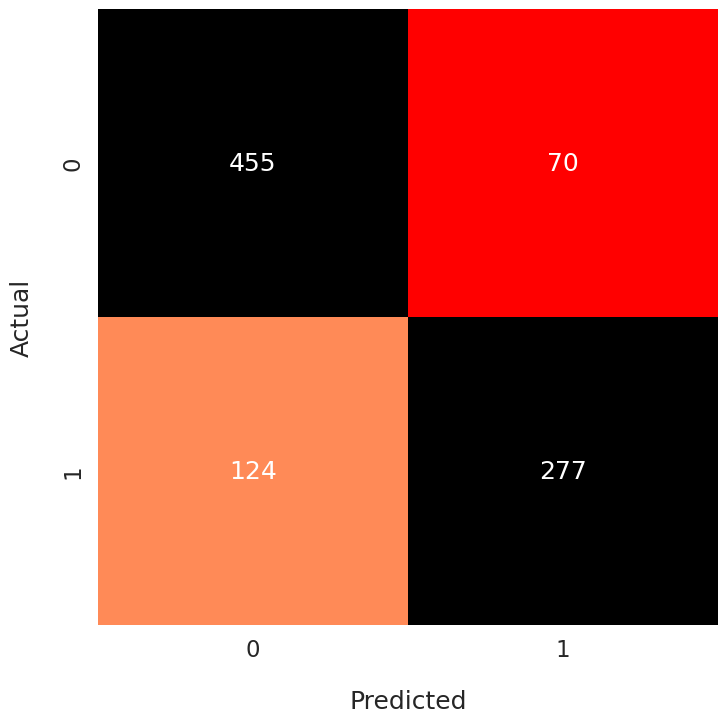

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,8))
sns.set(font_scale = 1.5)

ax = sns.heatmap(
    conf_matrix, # confusion matrix 2D array
    annot=True, # show numbers in the cells
    fmt='d', # show numbers as integers
    cbar=False, # don't show the color bar
    cmap='flag', # customize color map
    vmax=175 # to get better color contrast
)

ax.set_xlabel("Predicted", labelpad=20)
ax.set_ylabel("Actual", labelpad=20)
plt.show()

## Possible improvements
- To try ELI5. See  [Kaggle example: Logistic regression-Tf-Idf baseline](https://www.kaggle.com/code/kashnitsky/logistic-regression-tf-idf-baseline)

## References

- [Kaggle example: News Classification with TF-IDF & Machine Learning](https://www.kaggle.com/code/yogiyulianto/news-classification-with-tf-idf-machine-learning)
- [Kaggle example: Logistic regression-Tf-Idf baseline](https://www.kaggle.com/code/kashnitsky/logistic-regression-tf-idf-baseline)
- [Scikit-learn: 6.2.3. Извлечение текстовых признаков](https://scikit-learn.ru/6-2-feature-extraction/#text-feature-extraction)
- [Scikit-learn Tutorial: Working With Text Data](https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html)  
- Rajaraman, A.; Ullman, J.D. (2011). "Data Mining" (PDF). Mining of Massive Datasets. pp. 1–17. doi:10.1017/CBO9781139058452.002. ISBN 978-1-139-05845-- http://i.stanford.edu/~ullman/mmds/ch1.pdf
- Bracewell, D. B., Yan, J., Ren, F., & Kuroiwa, S. (2009). Category Classification and Topic Discovery of Japanese and English News Articles. Electronic Notes in Theoretical Computer Science, 225(C), 51–65. https://doi.org/10.1016/J.ENTCS.2008.12.066